In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [ ]:
files = ['/content/drive/MyDrive/dataForProject-20250805T045338Z-1-001/dataForProject/Sales_April_2019.csv',
         '/content/drive/MyDrive/dataForProject-20250805T045338Z-1-001/dataForProject/Sales_August_2019.csv',
         '/content/drive/MyDrive/dataForProject-20250805T045338Z-1-001/dataForProject/Sales_December_2019.csv',
         '/content/drive/MyDrive/dataForProject-20250805T045338Z-1-001/dataForProject/Sales_February_2019.csv',
         '/content/drive/MyDrive/dataForProject-20250805T045338Z-1-001/dataForProject/Sales_January_2019.csv',
         '/content/drive/MyDrive/dataForProject-20250805T045338Z-1-001/dataForProject/Sales_July_2019.csv',
         '/content/drive/MyDrive/dataForProject-20250805T045338Z-1-001/dataForProject/Sales_June_2019.csv',
         '/content/drive/MyDrive/dataForProject-20250805T045338Z-1-001/dataForProject/Sales_March_2019.csv',
         '/content/drive/MyDrive/dataForProject-20250805T045338Z-1-001/dataForProject/Sales_May_2019.csv',
         '/content/drive/MyDrive/dataForProject-20250805T045338Z-1-001/dataForProject/Sales_November_2019.csv',
         '/content/drive/MyDrive/dataForProject-20250805T045338Z-1-001/dataForProject/Sales_October_2019.csv',
         '/content/drive/MyDrive/dataForProject-20250805T045338Z-1-001/dataForProject/Sales_September_2019.csv']

In [ ]:
all_months_Data = pd.DataFrame()
for file in files:
  current_data=pd.read_csv(file)
  all_months_Data=pd.concat([all_months_Data,current_data])
  all_months_Data.to_csv("merged_data.csv",index=False)

In [ ]:
sales_df=pd.read_csv("merged_data.csv")


In [ ]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
sales_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [ ]:
temp_df=sales_df[sales_df['Order Date'] != 'Order Date']

In [ ]:
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
from os import name
nan_df=sales_df[sales_df['Order Date'].isna()]

In [ ]:
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sales_df=sales_df.dropna(axis=0,how='all')
sales_df=sales_df[sales_df['Order Date'] !='Order Date']

In [ ]:
pd.to_datetime(sales_df['Order Date'][0]).month

4

In [ ]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], errors='coerce')

/tmp/ipython-input-2696904893.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], errors='coerce')


In [ ]:
sales_df.dtypes.values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('<M8[ns]'),
       dtype('O')], dtype=object)

Argumenr Data with additional column

In [ ]:
sales_df['month'] = sales_df['Order Date'].dt.month.astype('int')

In [ ]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [ ]:
sales_df['Quantity Ordered']=sales_df['Quantity Ordered'].astype('int')
sales_df['Price Each']=sales_df['Price Each'].astype('float')

In [ ]:
sales_df['sales']=sales_df['Quantity Ordered']*sales_df['Price Each']

In [ ]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [ ]:
sales_df[['Street_Address','City','Zip_Code']] =sales_df['Purchase Address'].str.split(',',expand=True)


In [ ]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,Street_Address,City,Zip_Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001


In [ ]:
sales_df['State'] = sales_df['Purchase Address'].str.split(',', expand=True)[2].str.strip().str.split(' ').str[0]


In [ ]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,Street_Address,City,Zip_Code,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001,CA


In [ ]:
sales_df['hour']=sales_df['Order Date'].dt.hour.astype('int')

In [ ]:
sales_df['minute']=sales_df['Order Date'].dt.minute.astype('int')

In [ ]:
sales_df['count']=1

In [ ]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,Street_Address,City,Zip_Code,State,hour,minute,count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,MA,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,CA,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001,CA,9,27,1


In [ ]:
monthly_sales = sales_df.groupby('month')['sales'].sum()
display(monthly_sales)

,sales
month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


In [ ]:
best_month=monthly_sales.idxmax()
best_month_sales=monthly_sales.max()
print(f"{best_month_sales:,.2f}")

4,613,443.34


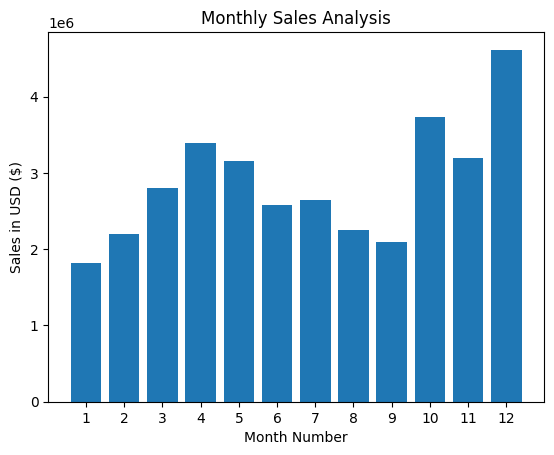

In [ ]:
months=range(1,13)
plt.bar(months,monthly_sales)
plt.xticks(months)
plt.xlabel("Month Number")
plt.ylabel("Sales in USD ($)")
plt.title("Monthly Sales Analysis")
plt.show()

In [ ]:
city_sales =sales_df.groupby('City')['sales'].sum()
best_city = city_sales.idxmax()
best_city_sales = city_sales.max()

print(f"{best_city_sales :,.2f}")

8,262,203.91


In [ ]:
display(sales_df.groupby(['hour']).count())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,Street_Address,City,Zip_Code,State,minute,count
hour,,,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


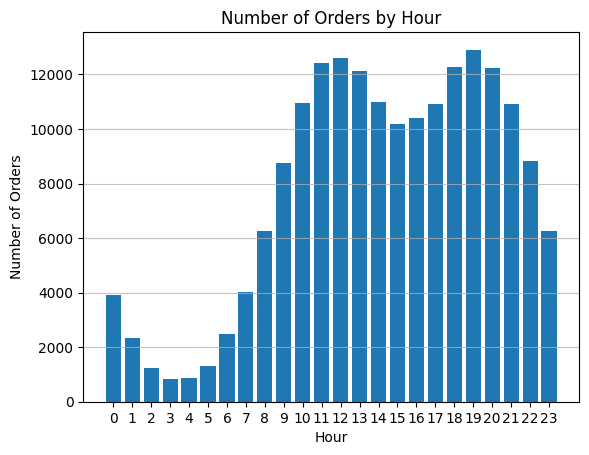

In [ ]:
hourly_counts = sales_df.groupby('hour').size()
hours = hourly_counts.index

plt.bar(hours,hourly_counts.values)
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Hour")
plt.grid(axis='y',alpha=0.75)
plt.show()

In [ ]:
dup_df=sales_df[sales_df['Order ID'].duplicated(keep = False)]
dup_df.head(20)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,Street_Address,City,Zip_Code,State,hour,minute,count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,CA,14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,20 Hill St,Los Angeles,CA 90001,CA,19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,20 Hill St,Los Angeles,CA 90001,CA,19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,823 Highland St,Boston,MA 02215,MA,11,31,1
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,823 Highland St,Boston,MA 02215,MA,11,31,1
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,365 Center St,San Francisco,CA 94016,CA,17,0,1
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,365 Center St,San Francisco,CA 94016,CA,17,0,1
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,778 Maple St,New York City,NY 10001,NY,11,7,1
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,778 Maple St,New York City,NY 10001,NY,11,7,1


In [ ]:
dup_df['Grouped']=dup_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
dup_df.head(20)

/tmp/ipython-input-980652116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_df['Grouped']=dup_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,Street_Address,City,Zip_Code,State,hour,minute,count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,CA,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,CA,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,20 Hill St,Los Angeles,CA 90001,CA,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,20 Hill St,Los Angeles,CA 90001,CA,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,823 Highland St,Boston,MA 02215,MA,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,823 Highland St,Boston,MA 02215,MA,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,365 Center St,San Francisco,CA 94016,CA,17,0,1,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,365 Center St,San Francisco,CA 94016,CA,17,0,1,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,778 Maple St,New York City,NY 10001,NY,11,7,1,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,778 Maple St,New York City,NY 10001,NY,11,7,1,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
dup_df = dup_df[['Order ID','Grouped']].drop_duplicates()
dup_df.head(10)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [ ]:
count=Counter()
for row in dup_df['Grouped']:
  row_list=row.split(',')
  count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
  print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [ ]:
sales_df.groupby('Product')['Quantity Ordered'].sum()

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


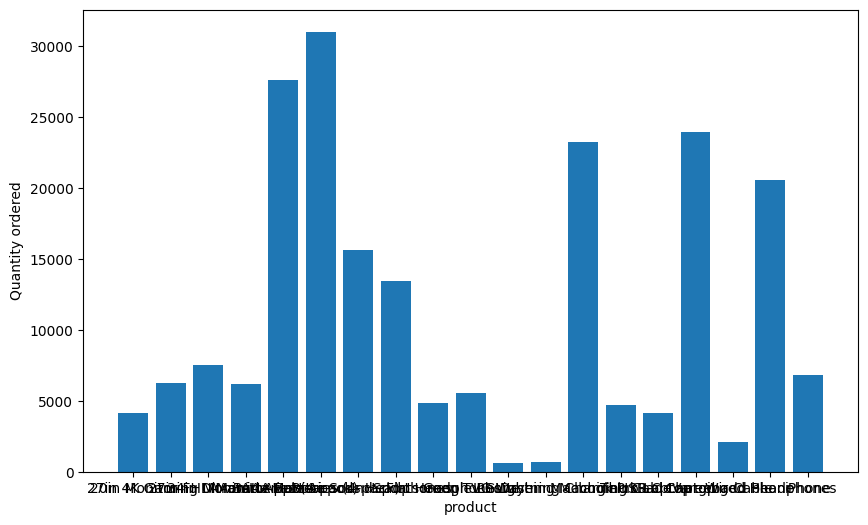

In [ ]:
product_sales=sales_df.groupby('Product')['Quantity Ordered'].sum()
plt.figure(figsize=(10,6))
plt.bar(product_sales.index,product_sales.values)
plt.xlabel("product")
plt.ylabel("Quantity ordered")
plt.show()

In [ ]:
sales_df.groupby('Product')['Quantity Ordered'].mean()

,Quantity Ordered
Product,
20in Monitor,1.006828
27in 4K Gaming Monitor,1.002247
27in FHD Monitor,1.005728
34in Ultrawide Monitor,1.002912
AA Batteries (4-pack),1.343004
AAA Batteries (4-pack),1.502689
Apple Airpods Headphones,1.007203
Bose SoundSport Headphones,1.009906
Flatscreen TV,1.003958


/tmp/ipython-input-3801544821.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_sales.index,rotation='vertical',size=8)


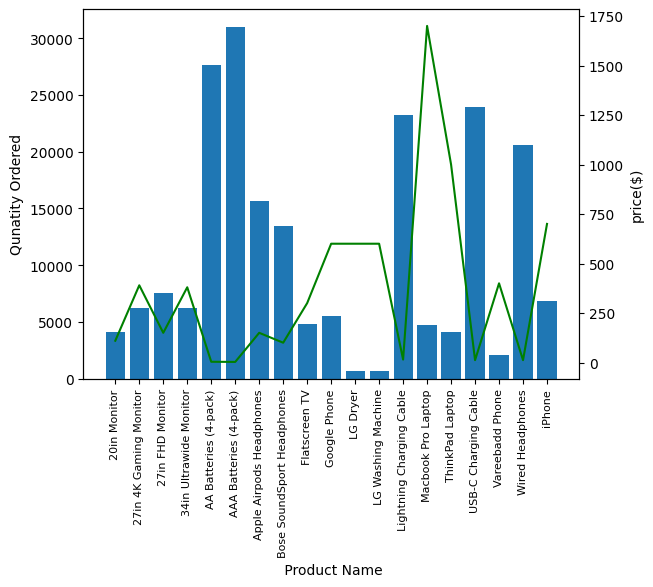

In [ ]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product_sales.index,sales_df.groupby('Product')['Quantity Ordered'].sum())
ax2.plot(product_sales.index,sales_df.groupby('Product')['Price Each'].mean(),'-g')
ax1.set_xlabel(' Product Name')
ax1.set_ylabel('Qunatity Ordered')
ax2.set_ylabel('price($)')
ax1.set_xticklabels(product_sales.index,rotation='vertical',size=8)
plt.show()
